In [1]:
%load_ext autoreload
%autoreload complete

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib_inline.backend_inline import set_matplotlib_formats
from protest_impact.util import cache, project_root
from tqdm.notebook import tqdm

set_matplotlib_formats("svg")

,shift,target,predictor,lag,coef,lower,upper
0,-10,media_protest,occ_FFF,0,NaN,NaN,NaN
1,-10,media_protest,prcp,0,21.254632,-122.382897,164.892160
0,-9,media_protest,occ_FFF,0,NaN,NaN,NaN
1,-9,media_protest,prcp,0,29.791368,-175.374888,234.957625
0,-8,media_protest,occ_FFF,0,NaN,NaN,NaN
1,-8,media_protest,prcp,0,24.772320,-149.563646,199.108286
0,-7,media_protest,occ_FFF,0,NaN,NaN,NaN
1,-7,media_protest,prcp,0,33.128470,-200.759884,267.016823
0,-6,media_protest,occ_FFF,0,NaN,NaN,NaN
1,-6,media_protest,prcp,0,43.792531,-268.827299,356.412361


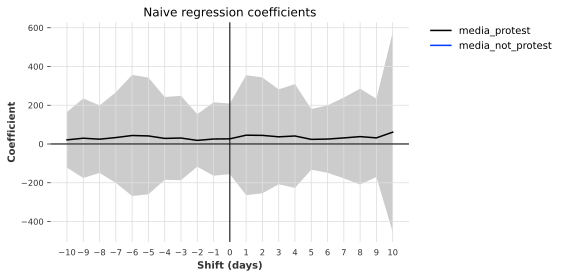

In [6]:
from linearmodels.iv import IV2SLS, IVGMM, IVLIML, compare
from protest_impact.data import german_region_names
from protest_impact.data.aggregation import instruments, naive_one_region
from protest_impact.time_series.lagged_impact import lagged_impact, plot_lagged_impact
from protest_impact.util.statsmodels import LMWrapper

region = "Bayern"
var = "occ_FFF"
df, vars = naive_one_region(region)
weather = instruments(region)
df["prcp"] = (weather["prcp"] > 0).astype(int)
df["media_protest"] = df["media_protest"] / df["media_protest"].mean()
df = df[["prcp", var, "media_protest"]]

lags = {
    (0, 0): ["prcp", var],
}

model = LMWrapper(
    IVLIML,
    fit_intercept=True,
    iv_cols=dict(
        dependent=["media_protest"],
        exog=["is_holiday"],
        endog=[var],
        instruments=["prcp"],
    ),
)
# res = model.fit(df.drop(columns=vars.y), df[["media_protest"]])
models, results = lagged_impact(
    [df], y_cols=["media_protest"], lags=lags, regressor=model
)
display(results)
plot_lagged_impact(results, "prcp")
plt.show()

PROBLEM : The wrong variable coefficients are contained!

In [11]:
res.results_.params[1:]

occ_FFF    26.589441
Name: parameter, dtype: float64